In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Train Datasets
Train=pd.read_csv(r'E:\MCA\Healthcare Provider Fraud - Dataset\Healthcare Dataset\Train.csv')
Train_Beneficiary_data=pd.read_csv(r'E:\MCA\Healthcare Provider Fraud - Dataset\Healthcare Dataset\Train_Beneficiarydata.csv')
Train_Inpatient_data=pd.read_csv(r'E:\MCA\Healthcare Provider Fraud - Dataset\Healthcare Dataset\Train_Inpatientdata.csv')
Train_Outpatient_data=pd.read_csv(r'E:\MCA\Healthcare Provider Fraud - Dataset\Healthcare Dataset\Train_Outpatientdata.csv')

# Test  Datasets
Test=pd.read_csv(r'E:\MCA\Healthcare Provider Fraud - Dataset\Healthcare Dataset\Test.csv')
Test_Beneficiary_data=pd.read_csv(r'E:\MCA\Healthcare Provider Fraud - Dataset\Healthcare Dataset\Test_Beneficiarydata.csv')
Test_Inpatient_data=pd.read_csv(r'E:\MCA\Healthcare Provider Fraud - Dataset\Healthcare Dataset\Test_Inpatientdata.csv')
Test_Outpatient_data=pd.read_csv(r'E:\MCA\Healthcare Provider Fraud - Dataset\Healthcare Dataset\Test_Outpatientdata.csv')

In [3]:
# Merging all train datasets
combined_in_out = pd.concat([Train_Inpatient_data, Train_Outpatient_data], ignore_index=True)
combined_with_benficiary = combined_in_out.merge(Train_Beneficiary_data, on='BeneID', how='left')
final_train_df = Train.merge(combined_with_benficiary, on='Provider', how='left')

print(Train_Inpatient_data.shape, Train_Outpatient_data.shape, '->', combined_in_out.shape)
print(combined_in_out.shape, Train_Beneficiary_data.shape, '->', combined_with_benficiary.shape)
print(Train.shape, combined_with_benficiary.shape, '->', final_train_df.shape)

(40474, 30) (517737, 28) -> (558211, 31)
(558211, 31) (138556, 25) -> (558211, 55)
(5410, 2) (558211, 55) -> (558211, 56)


In [4]:
# Merging all test datasets
combined_in_out = pd.concat([Test_Inpatient_data, Test_Outpatient_data], ignore_index=True)
combined_with_benficiary = combined_in_out.merge(Test_Beneficiary_data, on='BeneID', how='left')
final_test_df = Test.merge(combined_with_benficiary, on='Provider', how='left')

print(Test_Inpatient_data.shape, Test_Outpatient_data.shape, '->', combined_in_out.shape)
print(combined_in_out.shape, Test_Beneficiary_data.shape, '->', combined_with_benficiary.shape)
print(Test.shape, combined_with_benficiary.shape, '->', final_test_df.shape)

(9551, 30) (125841, 27) -> (135392, 30)
(135392, 30) (63968, 25) -> (135392, 54)
(1353, 1) (135392, 54) -> (135392, 54)


In [5]:
final_merge_df = pd.concat([final_train_df, final_test_df], ignore_index=True)
# final_df.to_csv('Final_Train_Test.csv', index=False)

print('Final dataset shape: ', final_merge_df.shape)

Final dataset shape:  (693603, 56)


In [6]:
# taking a copy of final dataset
final_merge_copy = final_merge_df.copy()
final_merge_copy.shape

(693603, 56)

In [7]:
# Showing Columns in each datasets
final_merge_copy.columns

Index(['Provider', 'PotentialFraud', 'BeneID', 'ClaimID', 'ClaimStartDt',
       'ClaimEndDt', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'Unnamed: 27', 'DOB', 'DOD',
       'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'Chr

In [8]:
final_merge_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693603 entries, 0 to 693602
Data columns (total 56 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Provider                         693603 non-null  object 
 1   PotentialFraud                   558211 non-null  object 
 2   BeneID                           693603 non-null  object 
 3   ClaimID                          693603 non-null  object 
 4   ClaimStartDt                     693603 non-null  object 
 5   ClaimEndDt                       693603 non-null  object 
 6   InscClaimAmtReimbursed           693603 non-null  int64  
 7   AttendingPhysician               691748 non-null  object 
 8   OperatingPhysician               141640 non-null  object 
 9   OtherPhysician                   248368 non-null  object 
 10  AdmissionDt                      50025 non-null   object 
 11  ClmAdmitDiagnosisCode            181255 non-null  object 
 12  De

## Data Cleaning  

In [9]:
date_columns = ['DOB', 'DOD', 'ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt']
for col in date_columns:
    if col in final_merge_copy.columns:
        final_merge_copy[col] = pd.to_datetime(final_merge_copy[col], errors='coerce')

### Handeling Missing Values

In [10]:
# Filling missing values with 0 or appropriate statistics (mean, median)
numeric_cols = final_merge_copy.select_dtypes(include=np.number).columns.tolist()
final_merge_copy[numeric_cols] = final_merge_copy[numeric_cols].fillna(0)

# For categorical data, filling missing values with 'unknown' or the most frequent category
categorical_cols = final_merge_copy.select_dtypes(include=['object', 'category']).columns.tolist()
final_merge_copy[categorical_cols] = final_merge_copy[categorical_cols].fillna('unknown')


### Feature Engineering

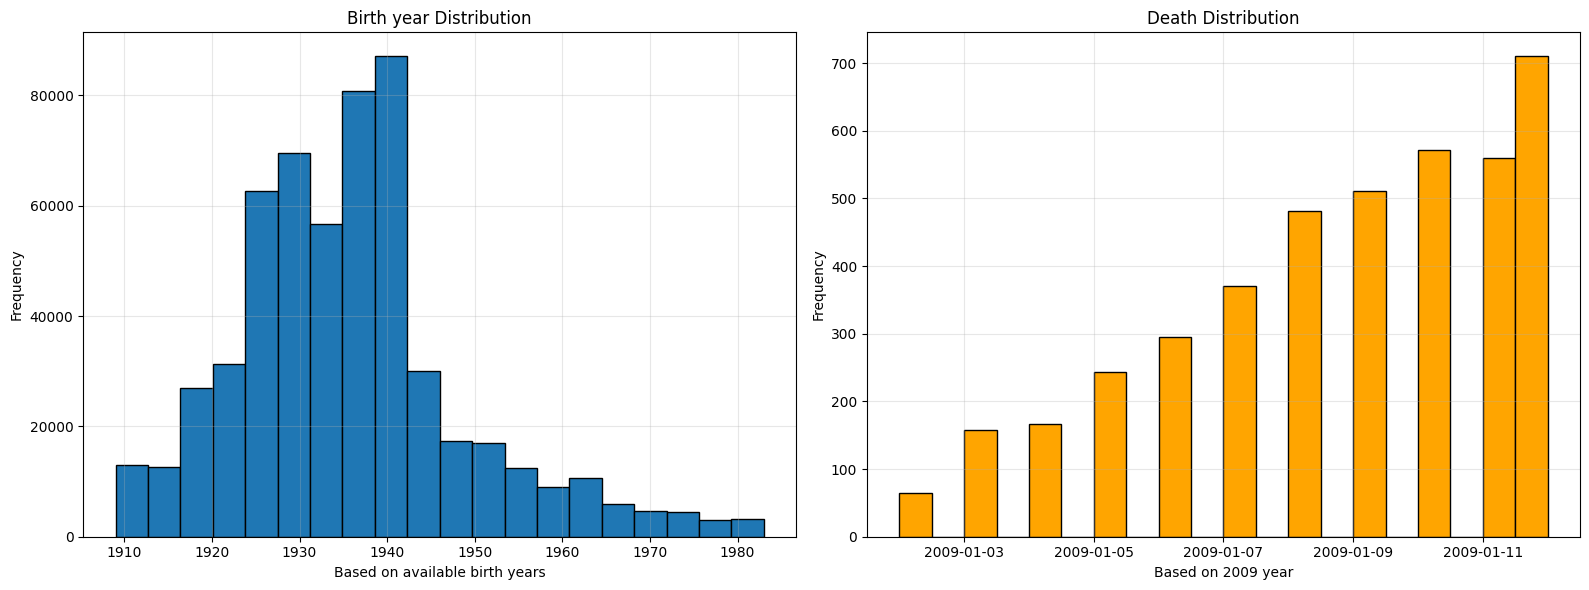

In [11]:
# null_count_df.columns = ['features', 'count']  # Rename columns appropriately
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.hist(final_merge_copy['DOB'].dt.year, bins=20, edgecolor='black')
plt.title('Birth year Distribution')
plt.xlabel('Based on available birth years')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(final_merge_copy[final_merge_copy['DOD'].notna()]['DOD'], bins=20, edgecolor='black', color='orange')
plt.title('Death Distribution')
plt.xlabel('Based on 2009 year')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Age

In [12]:
## Lets Create Age column to the dataset

final_merge_copy['Age'] = round(((final_merge_copy['DOD'] - final_merge_copy['DOB']).dt.days)/365)

In [13]:
## As we see that last DOD value is 2009-12-01 ,which means Beneficiary Details data is of year 2009.
## so we will calculate age of other benficiaries for year 2009.

final_merge_copy.Age.fillna(round(((pd.to_datetime('2009-12-31' , format = '%Y-%m-%d') - final_merge_copy['DOB']).dt.days)/365), inplace=True)

### Age Distribution after filling missing values

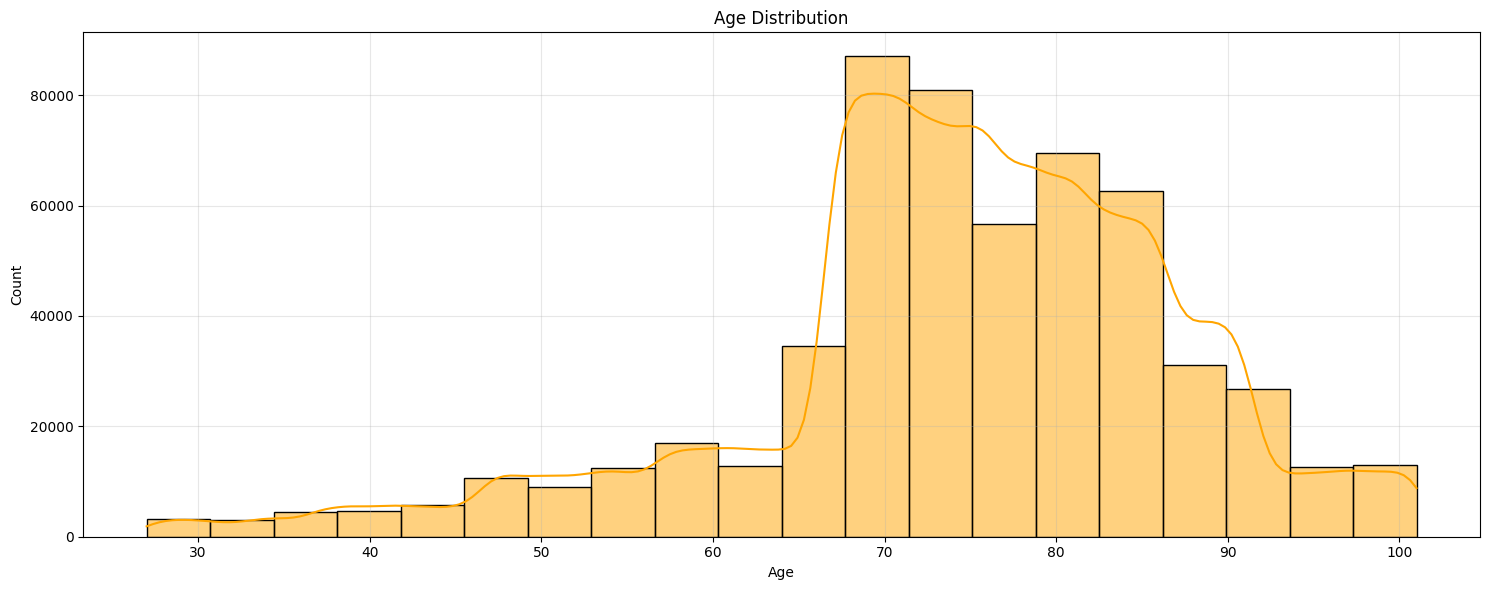

In [14]:
plt.figure(figsize=(15, 6))
sns.histplot(x='Age', data=final_merge_copy, color='orange',kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [15]:
# Calculate length of stay in days
final_merge_copy['LengthOfStay'] = (final_merge_copy['DischargeDt'] - final_merge_copy['AdmissionDt']).dt.days


In [16]:
# Summing  up all Chronic  conditions per beneficiary to get an overall helth risk score
final_merge_copy['TotalClaims'] = final_merge_copy.groupby('Provider')['Provider'].transform('count')

In [17]:
chronic_conditions  = [col for col in final_merge_copy.columns if 'ChronicCond_' in col]
final_merge_copy['ChronicConditionCount'] = final_merge_copy[chronic_conditions].sum(axis=1)

### Preparing Data Modelling

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding the 'PotentialFraud' column to numeric values
final_merge_copy['PotentialFraud'] = final_merge_copy['PotentialFraud'].map({'Yes': 1, 'No': 0})

# Identifying and encoding the necessary categorical columns
categorical_cols = ['Gender', 'Race']  # fixed typo in variable name

# Using LabelEncoder for each categorical column
le = LabelEncoder()
for col in categorical_cols:
    final_merge_copy[col] = le.fit_transform(final_merge_copy[col].astype(str))  # convert to string if not already

# Preparing the feature matrix (X) and the target vector (Y)
X = final_merge_copy.drop(['PotentialFraud'], axis=1, errors='ignore')  # fixed: should be 'drop', not call
Y = final_merge_copy['PotentialFraud']

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)  # fixed: 'randomstate' → 'random_state'

# Standardizing numeric features using StandardScaler
numeric_cols = X_train.select_dtypes(include=np.number).columns

# Initialize scaler
scaler = StandardScaler()

# Copying original features before scaling
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Applying scaling only to numeric columns
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])


### Data Training

In [19]:
# Ensuring all fetures are numeric formodel training
numeric_cols = final_merge_copy.select_dtypes(include=np.number).columns.tolist()

# Excluding any non-numeric columns
X = final_merge_copy[numeric_cols].drop(['PotentialFraud'], axis=1, errors='ignore')
Y = final_merge_copy['PotentialFraud']

# Splitting the dataset into training and testt split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Applying StandardScaler to numeric clumns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [20]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer for features (numeric data)
feature_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Apply the imputer to the training and test data
X_train_scaled_imputed = feature_imputer.fit_transform(X_train_scaled)
X_test_scaled_imputed = feature_imputer.transform(X_test_scaled)

# Replace any infinite values with large finite numbers
X_train_scaled_imputed = np.nan_to_num(X_train_scaled_imputed, nan=0.0, posinf=np.finfo(np.float64).max)
X_test_scaled_imputed = np.nan_to_num(X_test_scaled_imputed, nan=0.0, posinf=np.finfo(np.float64).max)

# Check for NaN in Y_train and Y_test
print("NaN count in Y_train before imputation:", Y_train.isna().sum())
print("NaN count in Y_test before imputation:", Y_test.isna().sum())

# Instantiate the imputer for the target variable (use mode for classification)
target_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Reshape Y_train and Y_test to 2D arrays as SimpleImputer expects 2D input
Y_train_reshaped = Y_train.values.reshape(-1, 1)
Y_test_reshaped = Y_test.values.reshape(-1, 1)

# Apply the imputer to the target variable
Y_train_imputed = target_imputer.fit_transform(Y_train_reshaped).ravel()
Y_test_imputed = target_imputer.transform(Y_test_reshaped).ravel()

# Verify no NaN values remain
print("NaN count in Y_train after imputation:", np.isnan(Y_train_imputed).sum())
print("NaN count in Y_test after imputation:", np.isnan(Y_test_imputed).sum())

NaN count in Y_train before imputation: 108342
NaN count in Y_test before imputation: 27050
NaN count in Y_train after imputation: 0
NaN count in Y_test after imputation: 0


In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score

# Result lists
model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

In [86]:

# Filter out NaNs in both training and test data
valid_train_idx = Y_train.notna()
valid_test_idx = Y_test.notna()


# Apply the masks to both features and labels
X_train_valid = X_train_scaled[valid_train_idx]
Y_train_valid = Y_train[valid_train_idx]
X_test_valid = X_test_scaled[valid_test_idx]
Y_test_valid = Y_test[valid_test_idx]

# Convert to integers to ensure clean binary classification
Y_train_valid = Y_train_valid.astype(int)
Y_test_valid = Y_test_valid.astype(int)

In [87]:
# Check for NaN values in Y_test
print("NaN values in Y_test:", np.isnan(Y_test).sum())
print("Total samples in Y_test:", len(Y_test))

# Remove NaN values from both Y_test and corresponding predictions
mask = ~np.isnan(Y_test)
Y_test_valid = Y_test[mask]
X_test_valid = X_test_scaled_imputed[mask]

# Predicting on the cleaned test data

print(f"\nOriginal test size: {len(Y_test)}")
print(f"Cleaned test size: {len(Y_test_valid)}\n\n")

NaN values in Y_test: 27050
Total samples in Y_test: 138721

Original test size: 138721
Cleaned test size: 111671




### Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf.fit(X_train_valid, Y_train_valid)

RandomForestClassifier(random_state=42)

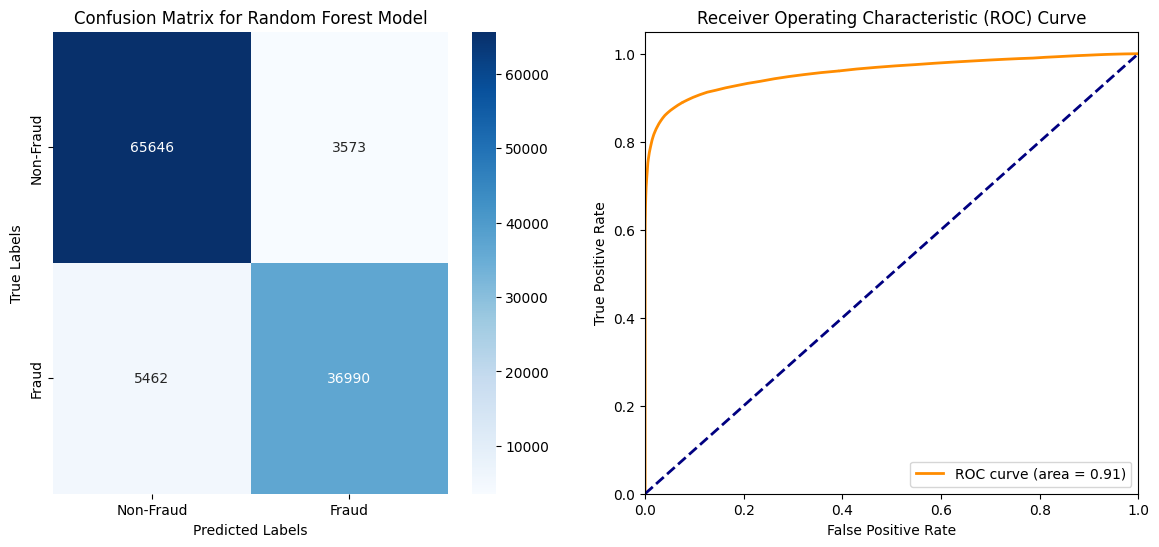

In [89]:
Y_pred = rf.predict(X_test_valid)

# Calculating evaluation metrics
accuracy = accuracy_score(Y_test_valid, Y_pred)
precision = precision_score(Y_test_valid, Y_pred)
recall = recall_score(Y_test_valid, Y_pred)
f1 = f1_score(Y_test_valid, Y_pred)
roc_auc = roc_auc_score(Y_test_valid, Y_pred)

model_list.append('RandomForest')
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)
roc_auc_list.append(roc_auc)

# Confusion Matrix
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
cm = confusion_matrix(Y_test_valid, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Model')

# ROC Curve
plt.subplot(1, 2, 2)
fpr, tpr, thresholds = roc_curve(Y_test_valid, rf.predict_proba(X_test_valid)[:, 1])
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Xgboost

In [90]:

# Filter out NaNs in both training and test data
valid_train_idx = Y_train.notna()
valid_test_idx = Y_test.notna()


# Apply the masks to both features and labels
X_train_valid = X_train_scaled[valid_train_idx]
Y_train_valid = Y_train[valid_train_idx]
X_test_valid = X_test_scaled[valid_test_idx]
Y_test_valid = Y_test[valid_test_idx]

# Convert to integers to ensure clean binary classification
Y_train_valid = Y_train_valid.astype(int)
Y_test_valid = Y_test_valid.astype(int)

In [91]:
from xgboost import XGBClassifier

# Initialize and fit XGBoost classifier
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_clf.fit(X_train_valid, Y_train_valid)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

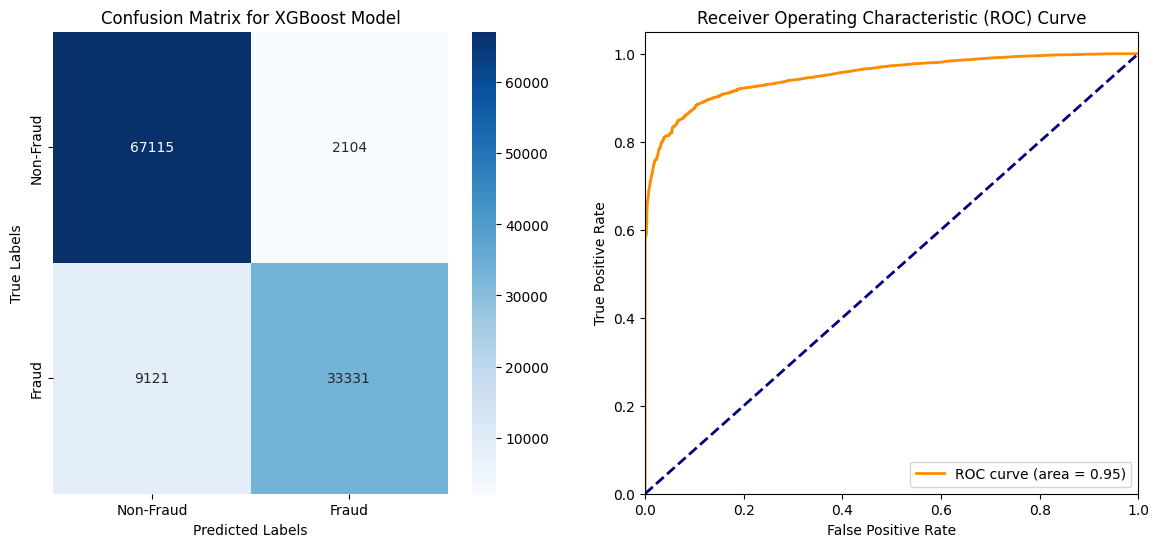

In [92]:

# Predictions
Y_pred = xgb_clf.predict(X_test_valid)
Y_pred_proba = xgb_clf.predict_proba(X_test_valid)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(Y_test_valid, Y_pred)
precision = precision_score(Y_test_valid, Y_pred)
recall = recall_score(Y_test_valid, Y_pred)
f1 = f1_score(Y_test_valid, Y_pred)
roc_auc = roc_auc_score(Y_test_valid, Y_pred_proba)

model_list.append('XGBoost')
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)
roc_auc_list.append(roc_auc)

# Confusion Matrix
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
cm = confusion_matrix(Y_test_valid, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGBoost Model')

# ROC Curve
plt.subplot(1, 2, 2)
fpr, tpr, thresholds = roc_curve(Y_test_valid, Y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Support Vector Machines (SVM)

In [93]:
# Filter out NaNs in both training and test data
valid_train_idx = Y_train.notna()
valid_test_idx = Y_test.notna()

# Apply the masks to both features and labels
X_train_valid = X_train_scaled_imputed[valid_train_idx]
Y_train_valid = Y_train[valid_train_idx]
X_test_valid = X_test_scaled_imputed[valid_test_idx]
Y_test_valid = Y_test[valid_test_idx]

# Convert to integers to ensure clean binary classification
Y_train_valid = Y_train_valid.astype(int)
Y_test_valid = Y_test_valid.astype(int)

In [94]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

# Initialize the Linear Support Vector Classifier
svc_clf = LinearSVC(random_state=42, max_iter=1000, dual=False)
svc_clf = CalibratedClassifierCV(svc_clf)

# Fit the model on cleaned training data
svc_clf.fit(X_train_valid, Y_train_valid)

CalibratedClassifierCV(estimator=LinearSVC(dual=False, random_state=42))

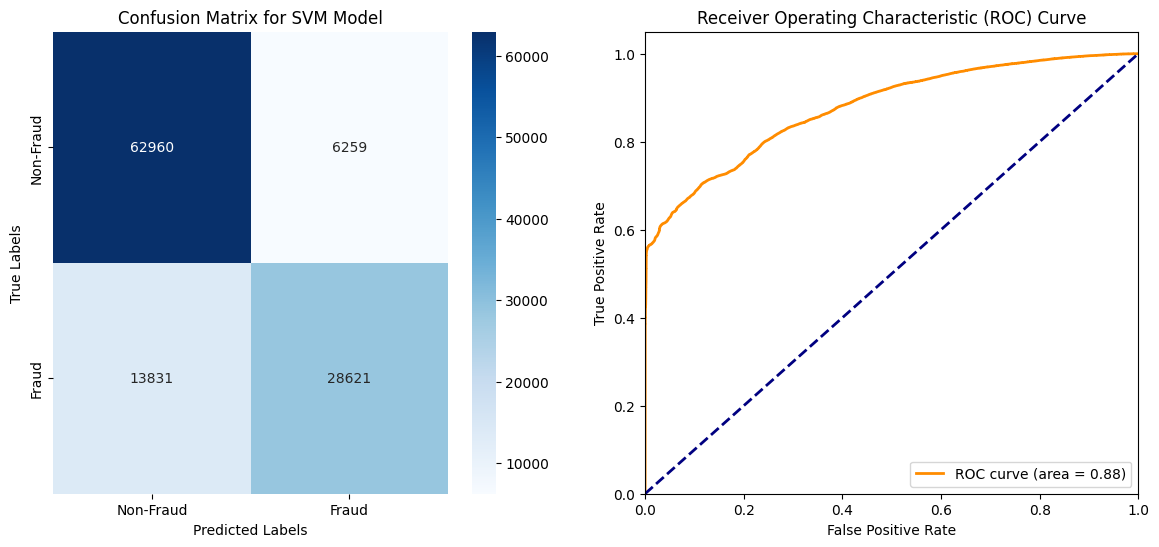

In [95]:
# Predictions on cleaned test data
Y_pred = svc_clf.predict(X_test_valid)
Y_pred_proba = svc_clf.predict_proba(X_test_valid)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(Y_test_valid, Y_pred)
precision = precision_score(Y_test_valid, Y_pred)
recall = recall_score(Y_test_valid, Y_pred)
f1 = f1_score(Y_test_valid, Y_pred)
roc_auc = roc_auc_score(Y_test_valid, Y_pred_proba)

model_list.append('SVM')
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)
roc_auc_list.append(roc_auc)

# Confusion Matrix
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
cm = confusion_matrix(Y_test_valid, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM Model')

# ROC Curve
plt.subplot(1, 2, 2)
fpr, tpr, thresholds = roc_curve(Y_test_valid, Y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression
lr_clf = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model on cleaned training data
lr_clf.fit(X_train_valid, Y_train_valid)

LogisticRegression(max_iter=1000, random_state=42)

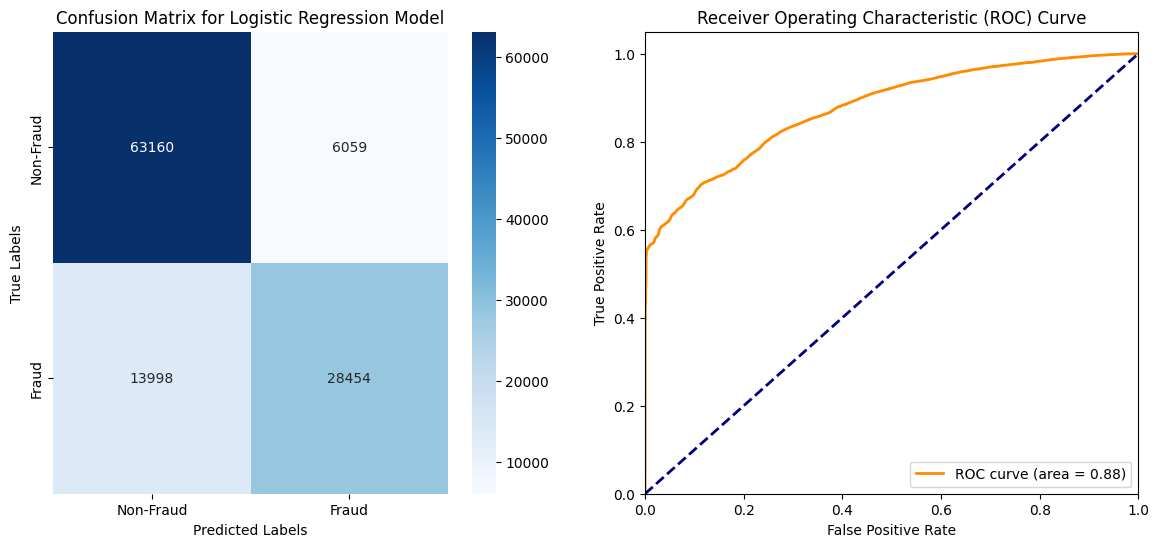

In [97]:
# Predictions on cleaned test data
Y_pred = lr_clf.predict(X_test_valid)
Y_pred_proba = lr_clf.predict_proba(X_test_valid)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(Y_test_valid, Y_pred)
precision = precision_score(Y_test_valid, Y_pred)
recall = recall_score(Y_test_valid, Y_pred)
f1 = f1_score(Y_test_valid, Y_pred)
roc_auc = roc_auc_score(Y_test_valid, Y_pred_proba)

model_list.append('Logistic')
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)
roc_auc_list.append(roc_auc)

# Confusion Matrix
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
cm = confusion_matrix(Y_test_valid, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression Model')

# ROC Curve
plt.subplot(1, 2, 2)
fpr, tpr, thresholds = roc_curve(Y_test_valid, Y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Decision Tree Classifier

In [98]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)

# Fit the model on cleaned training data
dt_clf.fit(X_train_valid, Y_train_valid)

DecisionTreeClassifier(random_state=42)

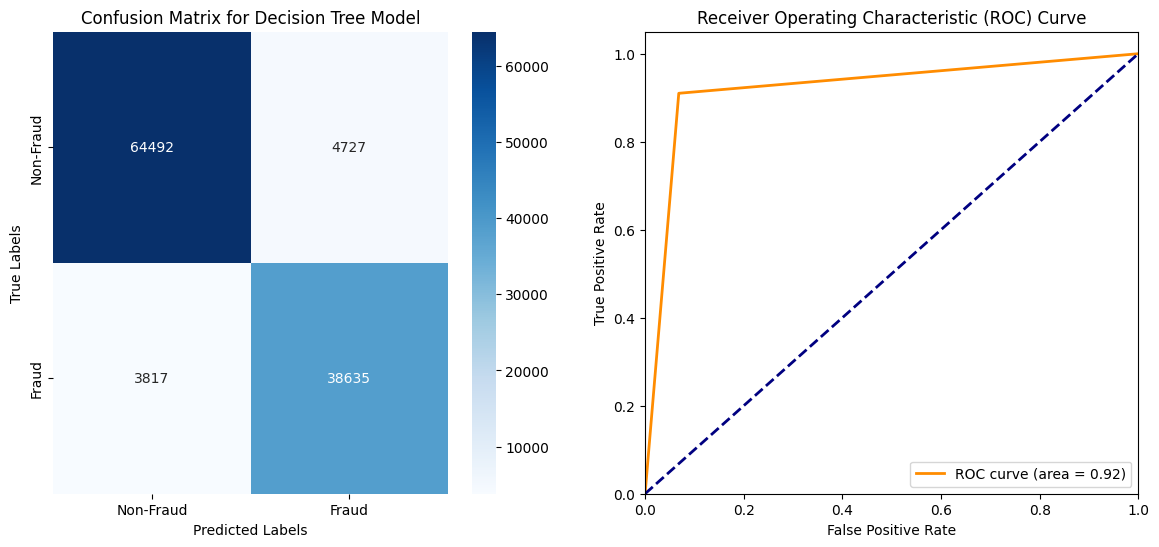

In [99]:
# Predictions on cleaned test data
Y_pred = dt_clf.predict(X_test_valid)
Y_pred_proba = dt_clf.predict_proba(X_test_valid)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(Y_test_valid, Y_pred)
precision = precision_score(Y_test_valid, Y_pred)
recall = recall_score(Y_test_valid, Y_pred)
f1 = f1_score(Y_test_valid, Y_pred)
roc_auc = roc_auc_score(Y_test_valid, Y_pred_proba)

model_list.append('DecisionTree')
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)
roc_auc_list.append(roc_auc)

# Confusion Matrix
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
cm = confusion_matrix(Y_test_valid, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree Model')

# ROC Curve
plt.subplot(1, 2, 2)
fpr, tpr, thresholds = roc_curve(Y_test_valid, Y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

###  LightGBM Classifier

In [100]:
from lightgbm import LGBMClassifier

# Initialize LightGBM
lgbm_clf = LGBMClassifier(random_state=42, verbose=-1)

# Fit the model on cleaned training data
lgbm_clf.fit(X_train_valid, Y_train_valid)

LGBMClassifier(random_state=42, verbose=-1)

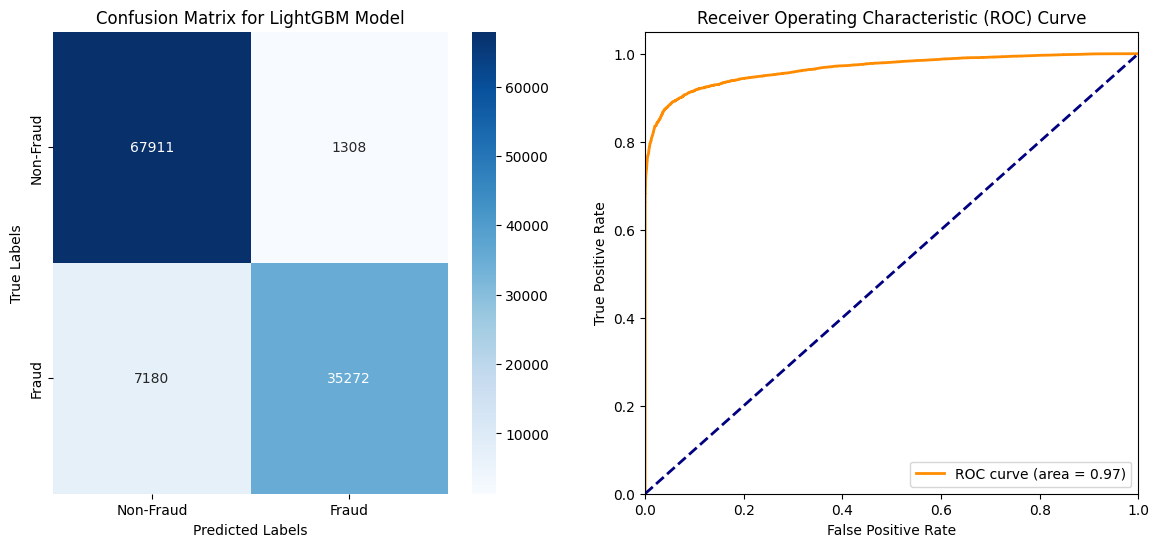

In [101]:
# Predictions on cleaned test data
Y_pred = lgbm_clf.predict(X_test_valid)
Y_pred_proba = lgbm_clf.predict_proba(X_test_valid)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(Y_test_valid, Y_pred)
precision = precision_score(Y_test_valid, Y_pred)
recall = recall_score(Y_test_valid, Y_pred)
f1 = f1_score(Y_test_valid, Y_pred)
roc_auc = roc_auc_score(Y_test_valid, Y_pred_proba)

model_list.append('LightGBM')
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)
roc_auc_list.append(roc_auc)

# Confusion Matrix
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
cm = confusion_matrix(Y_test_valid, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for LightGBM Model')

# ROC Curve
plt.subplot(1, 2, 2)
fpr, tpr, thresholds = roc_curve(Y_test_valid, Y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### CatBoost Classifier

In [102]:
from catboost import CatBoostClassifier

# Initialize CatBoost
cat_clf = CatBoostClassifier(random_state=42, verbose=False)

# Fit the model on cleaned training data
cat_clf.fit(X_train_valid, Y_train_valid)

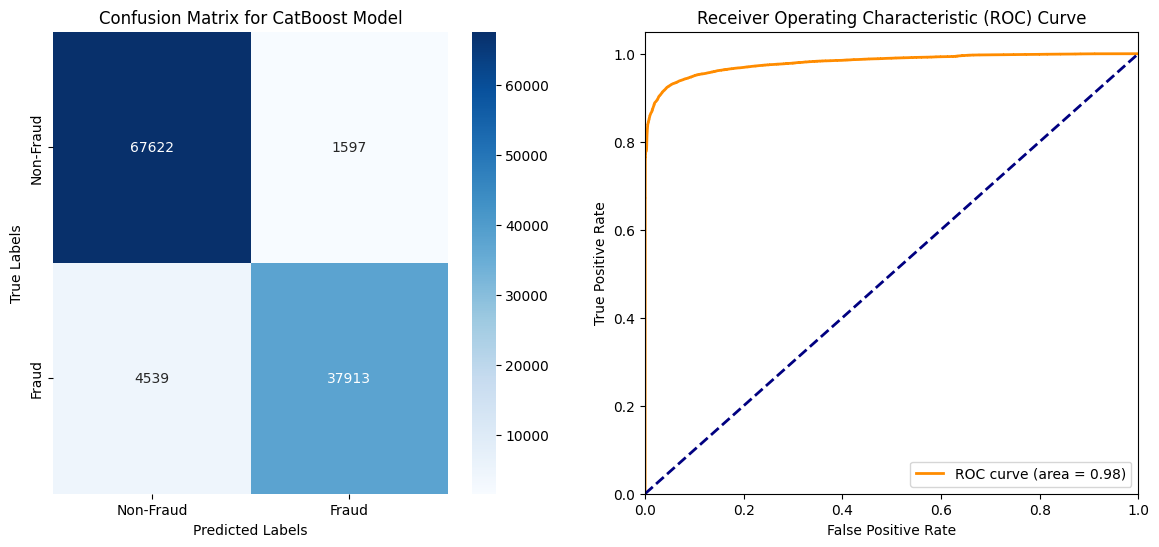

In [103]:
# Predictions on cleaned test data
Y_pred = cat_clf.predict(X_test_valid)
Y_pred_proba = cat_clf.predict_proba(X_test_valid)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(Y_test_valid, Y_pred)
precision = precision_score(Y_test_valid, Y_pred)
recall = recall_score(Y_test_valid, Y_pred)
f1 = f1_score(Y_test_valid, Y_pred)
roc_auc = roc_auc_score(Y_test_valid, Y_pred_proba)

model_list.append('CatBoost')
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)
roc_auc_list.append(roc_auc)

# Confusion Matrix
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
cm = confusion_matrix(Y_test_valid, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for CatBoost Model')

# ROC Curve
plt.subplot(1, 2, 2)
fpr, tpr, thresholds = roc_curve(Y_test_valid, Y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Gradient Boosting Classifier

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting
gb_clf = GradientBoostingClassifier(random_state=42)

# Fit the model on cleaned training data
gb_clf.fit(X_train_valid, Y_train_valid)

GradientBoostingClassifier(random_state=42)

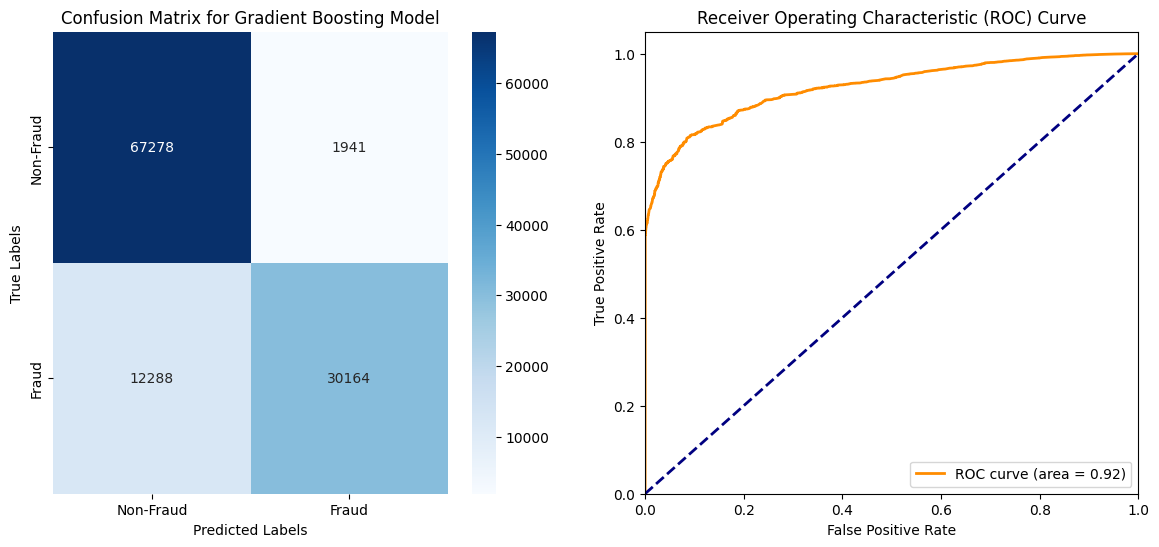

In [105]:
# Predictions on cleaned test data
Y_pred = gb_clf.predict(X_test_valid)
Y_pred_proba = gb_clf.predict_proba(X_test_valid)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(Y_test_valid, Y_pred)
precision = precision_score(Y_test_valid, Y_pred)
recall = recall_score(Y_test_valid, Y_pred)
f1 = f1_score(Y_test_valid, Y_pred)
roc_auc = roc_auc_score(Y_test_valid, Y_pred_proba)

model_list.append('GradientBoosting')
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)
roc_auc_list.append(roc_auc)

# Confusion Matrix
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
cm = confusion_matrix(Y_test_valid, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Gradient Boosting Model')

# ROC Curve
plt.subplot(1, 2, 2)
fpr, tpr, thresholds = roc_curve(Y_test_valid, Y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### AdaBoost Classifier

In [106]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost
ada_clf = AdaBoostClassifier(random_state=42)

# Fit the model on cleaned training data
ada_clf.fit(X_train_valid, Y_train_valid)

AdaBoostClassifier(random_state=42)

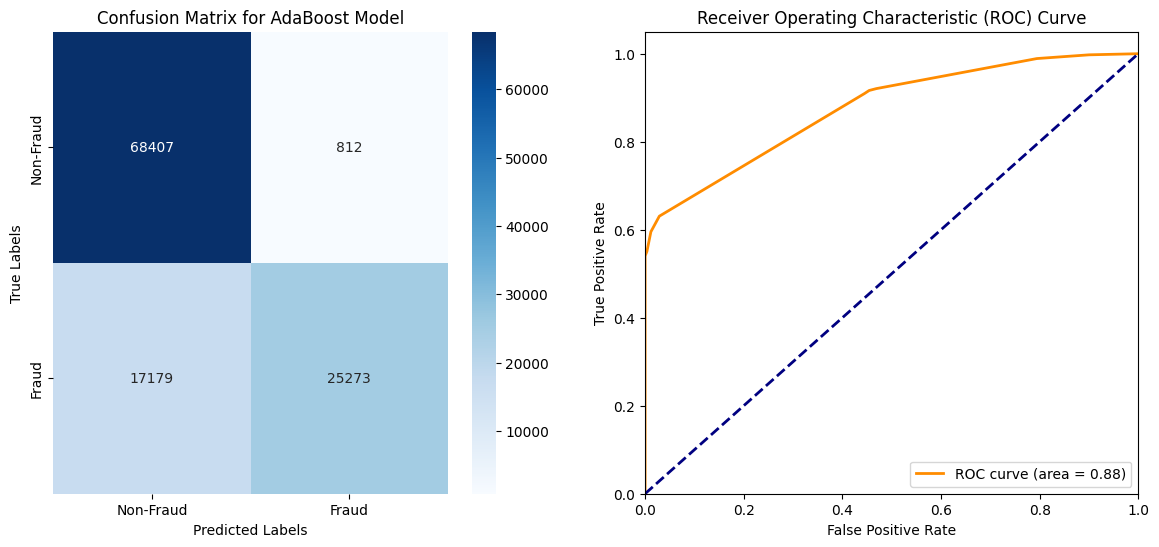

In [107]:
# Predictions on cleaned test data
Y_pred = ada_clf.predict(X_test_valid)
Y_pred_proba = ada_clf.predict_proba(X_test_valid)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(Y_test_valid, Y_pred)
precision = precision_score(Y_test_valid, Y_pred)
recall = recall_score(Y_test_valid, Y_pred)
f1 = f1_score(Y_test_valid, Y_pred)
roc_auc = roc_auc_score(Y_test_valid, Y_pred_proba)

model_list.append('AdaBoost')
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)
roc_auc_list.append(roc_auc)

# Confusion Matrix
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
cm = confusion_matrix(Y_test_valid, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for AdaBoost Model')

# ROC Curve
plt.subplot(1, 2, 2)
fpr, tpr, thresholds = roc_curve(Y_test_valid, Y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##

## Comparative Analysis of Machine Learning Models for Healthcare Fraud Detection

In [108]:
# Create and display results DataFrame
results_dict = {
    "Model": model_list,
    "Accuracy": accuracy_list,
    "Precision": precision_list,
    "Recall": recall_list,
    "F1 Score": f1_list,
    "ROC AUC Score": roc_auc_list
}

results_df = pd.DataFrame(results_dict)
print("\nModel Comparison Results:")
results_df




Model Comparison Results:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,RandomForest,0.919093,0.911915,0.871337,0.891164,0.909859
1,RandomForest,0.919093,0.911915,0.871337,0.891164,0.909859
2,XGBoost,0.899482,0.940624,0.785146,0.855881,0.950355
3,SVM,0.820097,0.820556,0.674197,0.740211,0.877119
4,Logistic,0.820392,0.824443,0.670263,0.739401,0.876285
5,DecisionTree,0.923490,0.890988,0.910087,0.900436,0.920895
6,LightGBM,0.923991,0.964243,0.830868,0.892600,0.965834
7,CatBoost,0.945053,0.959580,0.893079,0.925136,0.980192
8,GradientBoosting,0.872581,0.939542,0.710544,0.809153,0.924063
9,AdaBoost,0.838893,0.968871,0.595331,0.737499,0.875097


In [109]:
# Optional: Sort by F1 Score for better comparison
results_df_sorted = results_df.sort_values('F1 Score', ascending=False)
print("\nResults sorted by F1 Score:")
results_df_sorted


Results sorted by F1 Score:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
7,CatBoost,0.945053,0.959580,0.893079,0.925136,0.980192
5,DecisionTree,0.923490,0.890988,0.910087,0.900436,0.920895
6,LightGBM,0.923991,0.964243,0.830868,0.892600,0.965834
0,RandomForest,0.919093,0.911915,0.871337,0.891164,0.909859
1,RandomForest,0.919093,0.911915,0.871337,0.891164,0.909859
2,XGBoost,0.899482,0.940624,0.785146,0.855881,0.950355
8,GradientBoosting,0.872581,0.939542,0.710544,0.809153,0.924063
3,SVM,0.820097,0.820556,0.674197,0.740211,0.877119
4,Logistic,0.820392,0.824443,0.670263,0.739401,0.876285
9,AdaBoost,0.838893,0.968871,0.595331,0.737499,0.875097


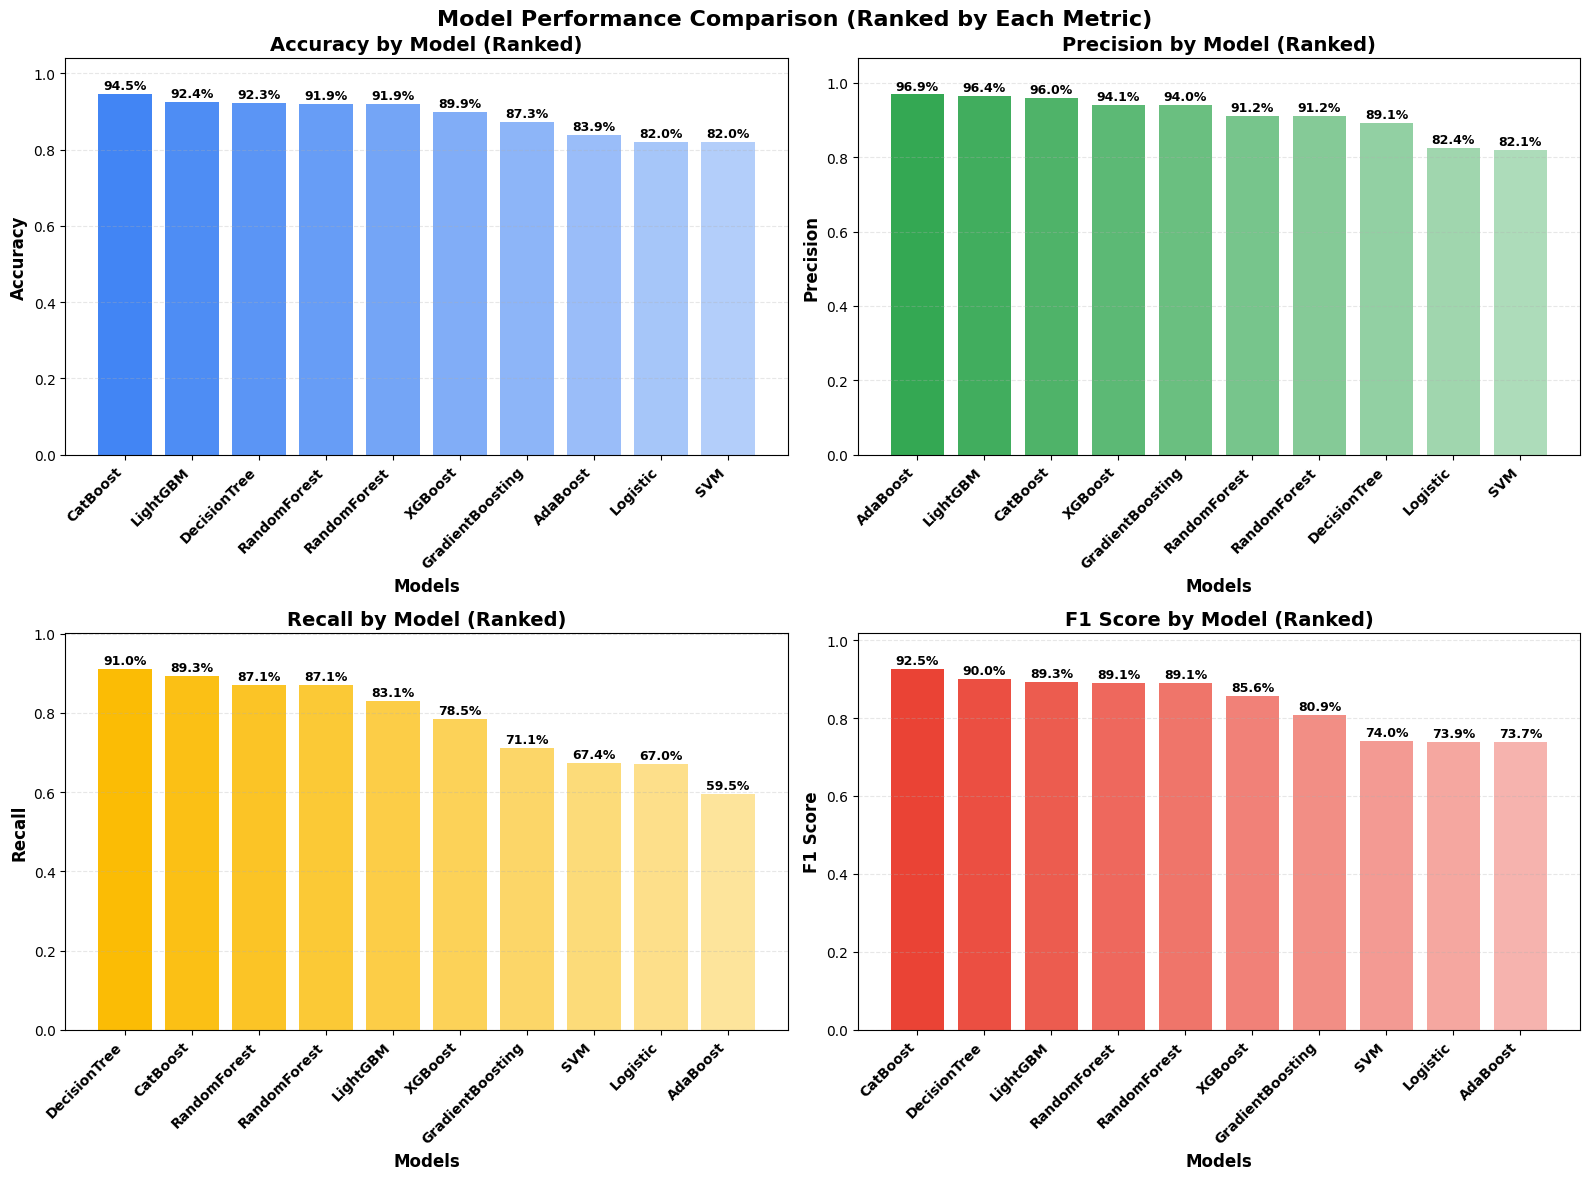


Model Rankings by Each Metric:

Accuracy Rankings:
1. CatBoost: 94.51%
2. LightGBM: 92.40%
3. DecisionTree: 92.35%
4. RandomForest: 91.91%
5. RandomForest: 91.91%
6. XGBoost: 89.95%
7. GradientBoosting: 87.26%
8. AdaBoost: 83.89%
9. Logistic: 82.04%
10. SVM: 82.01%

Precision Rankings:
1. AdaBoost: 96.89%
2. LightGBM: 96.42%
3. CatBoost: 95.96%
4. XGBoost: 94.06%
5. GradientBoosting: 93.95%
6. RandomForest: 91.19%
7. RandomForest: 91.19%
8. DecisionTree: 89.10%
9. Logistic: 82.44%
10. SVM: 82.06%

Recall Rankings:
1. DecisionTree: 91.01%
2. CatBoost: 89.31%
3. RandomForest: 87.13%
4. RandomForest: 87.13%
5. LightGBM: 83.09%
6. XGBoost: 78.51%
7. GradientBoosting: 71.05%
8. SVM: 67.42%
9. Logistic: 67.03%
10. AdaBoost: 59.53%

F1 Score Rankings:
1. CatBoost: 92.51%
2. DecisionTree: 90.04%
3. LightGBM: 89.26%
4. RandomForest: 89.12%
5. RandomForest: 89.12%
6. XGBoost: 85.59%
7. GradientBoosting: 80.92%
8. SVM: 74.02%
9. Logistic: 73.94%
10. AdaBoost: 73.75%


In [110]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define base colors for each metric (from your color palette)
base_colors = {
    "Accuracy": "#4285F4",      # Blue
    "Precision": "#34A853",     # Green
    "Recall": "#FBBC05",        # Yellow/Orange
    "F1 Score": "#EA4335"       # Red
}

# List of metrics to plot
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Create bar plots for each metric
plt.figure(figsize=(16, 12))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    
    # Sort the data in decreasing order for current metric
    sorted_data = results_df.sort_values(metric, ascending=False)
    
    # Extract sorted values and labels
    values = sorted_data[metric]
    labels = sorted_data["Model"]
    
    # Create gradient colors for this metric
    base_color = base_colors[metric]
    # Create a colormap from lighter to darker shade
    colors = []
    for j in range(len(values)):
        # Scale from 0.4 (lighter) to 1.0 (darkest) based on rank
        intensity = 1.0 - (j / (len(values) - 1)) * 0.6  # From 1.0 to 0.4
        # Convert hex to RGB and apply intensity
        hex_color = base_color.lstrip('#')
        r = int(hex_color[0:2], 16)
        g = int(hex_color[2:4], 16)
        b = int(hex_color[4:6], 16)
        
        # Apply intensity (darker for higher values)
        r = int(r * intensity + 255 * (1 - intensity))
        g = int(g * intensity + 255 * (1 - intensity))
        b = int(b * intensity + 255 * (1 - intensity))
        
        colors.append(f'#{r:02x}{g:02x}{b:02x}')
    
    # Create bar plot with gradient colors
    bars = plt.bar(range(len(values)), values, color=colors)
    
    # Customize the plot
    plt.title(f'{metric} by Model (Ranked)', fontsize=14, fontweight='bold')
    plt.xlabel('Models', fontsize=12, fontweight='bold')
    plt.ylabel(metric, fontsize=12, fontweight='bold')
    
    # Set x-axis labels with rotation for better readability
    plt.xticks(range(len(labels)), labels, rotation=45, ha='right', fontweight='bold')
    
    # Add value labels on top of bars (as percentages)
    for j, (bar, value) in enumerate(zip(bars, values)):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                f'{value*100:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # Set y-axis limits for better visualization
    plt.ylim(0, max(values) * 1.1)
    
    # Add grid for better readability
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Tight layout for current subplot
    plt.tight_layout()

plt.suptitle('Model Performance Comparison (Ranked by Each Metric)', 
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Optional: Print the rankings for each metric
print("\nModel Rankings by Each Metric:")
print("=" * 50)
for metric in metrics:
    sorted_data = results_df.sort_values(metric, ascending=False)
    print(f"\n{metric} Rankings:")
    for rank, (idx, row) in enumerate(sorted_data.iterrows(), 1):
        print(f"{rank}. {row['Model']}: {row[metric]*100:.2f}%")